# A. Выйду ночью в поле конём (1б)

Дано шахматное поле размером N x M. В левом верхнем углу поля стоит шахматный конь. Необходимо найти количество способов, которыми он может прийти в правый нижний угол поля. В силу большого желания прийти в противоположный конец поля, конь может перемещаться только на две клетки вниз и на одну вправо или на одну клетку вниз и на две вправо.

Формат ввода
Размер поля -- натуральные числа N >= 2 и K >= 2.
- через пробел
N, M = map(int, input().split())

Формат вывода
Одно число -- количество путей из левого верхнего угла в правый нижний.

Как решить?
Нужно представить, что поле это таблица размерами N на M, заполненная нулями
field = [[0]*M for _ in range(N)]


Изначально конь по условию в левом верхнем углу, это положение    field[0][0] = 1 - равно 1 потому что способов прийти в первую клетку 1- начать с нее.

Затем рекурсия. Почему? Пусть мы стоим в клетке (i, j) и хотим переместить коня (i+2, j+1) или (i+1, j+2).
Тогда чтобы узнать кол-во способов, которыми мы можем попасть на выбранную новую клетку, нам надо прибавить кол-во способов попасть на  (i, j).

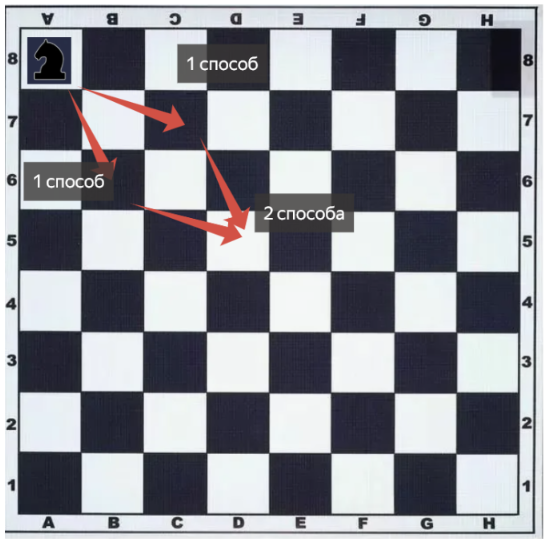

### A

In [20]:
def horse(N, M):
    field = [[0]*M for k in range(N)]
    print (field, "Создали поле")
    field[0][0] = 1
    print (field, "Добавили кол-во способов для 1-ой клетки")
    for i in range(N):
        for j in range(M):
            if i+2 < N and j+1 < M:
                field[i+2][j+1] += field[i][j]
            if i+1 < N and j+2 < M:
                field[i+1][j+2] += field[i][j]
  
    print (field, "Поле в конце перестановок")
    return field[N-1][M-1]

N, M = map(int, input().split())
print(horse(N, M))

 3 2


[[0, 0], [0, 0], [0, 0]] Создали поле
[[1, 0], [0, 0], [0, 0]] Добавили кол-во способов для 1-ой клетки
[[1, 0], [0, 0], [0, 1]] Поле в конце перестановок
1


# D.Землемер

самый большой участок из возможных

### D

In [3]:
def _max_area(N, K, matrix):
    map_ = [[0] * K for _ in range(N)]
    max_side = 0 
    for i in range(N):
        for j in range(K):
            if matrix[i][j] == 1: # проверка свободен ли участок)
                if i > 0 and j > 0:
                    map_[i][j] = min(map_[i-1][j], map_[i][j-1], map_[i-1][j-1]) + 1
                else:
                    map_[i][j] = 1
                max_side = max(max_side, map_[i][j])
                
    return max_side

N, K = map(int, input().split())
matrix = [list(map(int, input().split())) for _ in range(N)]

print(_max_area(N, K, matrix))


 4 4
 1 0 0 1
 1 0 0 1
 1 1 0 0
 1 1 0 1


2


# B. Волшебный калькулятор (1б)

Мы можем добавлять 1 к числу, удваивать его или утраивать его

Какое минимальное количество действий, чтобы из 1 получить N?

Как и в прошлых задачах нужно 2 массива данных. Каких?

### B

In [4]:
def min_oper_to_n(n):
    min_oper_ = [0] * (n + 1)
    path = [0] * (n + 1)

    for i in range(2, n + 1):
        min_oper_[i] = min_oper_[i - 1] + 1
        path[i] = i - 1
        
        if i % 2 == 0 and min_oper_[i // 2] + 1 < min_oper_[i]:
            min_oper_[i] = min_oper_[i // 2] + 1
            path[i] = i // 2
        
        if i % 3 == 0 and min_oper_[i // 3] + 1 < min_oper_[i]:
            min_oper_[i] = min_oper_[i // 3] + 1
            path[i] = i // 3

 6


2
1 3 6
